In [2]:
import pandas as pd
import numpy as np
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

Read in data

In [49]:
results = pd.read_csv('experiment_general_results.csv')
#wish_results = pd.read_csv('wishart_experiment_samplesize_results.csv')
wish_results = pd.read_csv('wishart_experiments/wishart_experiment_adjusted_wish_minimal_results2.csv')

Import KME results in correct format and extract true positive and false positive rates.

In [21]:
results_mean = results.groupby(['b','d','KME','E','K','n_samples','n_distributions']).mean()
results_mean.insert(1, 'acc_std', results.groupby(['b','d','KME','E','K','n_samples','n_distributions'])[['score']].std())
#print(results_mean.reset_index().to_markdown())

In [22]:
true_pos = results_mean['truepos'] / (results_mean['truepos'] + results_mean['falseneg'])
false_pos = results_mean['falsepos'] / (results_mean['falsepos'] + results_mean['trueneg'])

Import Wishart results in correect format and extract true positive and false positive rates.

In [50]:
wish_results_lin = wish_results[wish_results['linear'] == True] 
wish_results_nonlin = wish_results[wish_results['linear'] == False] 

In [51]:
wish_results_lin_mean = wish_results_lin.groupby(['b','d','nsamples']).mean()
wish_results_lin_mean.insert(2, 'acc_std', wish_results_lin.groupby(['b','d','nsamples'])[['accuracy']].std())
wish_results_nonlin_mean = wish_results_nonlin.groupby(['b','d','nsamples']).mean()
wish_results_nonlin_mean.insert(2, 'acc_std', wish_results_nonlin.groupby(['b','d','nsamples'])[['accuracy']].std())

In [52]:
true_pos_wish_lin = wish_results_lin_mean['truepos'] / (wish_results_lin_mean['truepos'] + wish_results_lin_mean['falseneg'])
false_pos_wish_lin = wish_results_lin_mean['falsepos'] / (wish_results_lin_mean['falsepos'] + wish_results_lin_mean['trueneg'])
true_pos_wish_nonlin = wish_results_nonlin_mean['truepos'] / (wish_results_nonlin_mean['truepos'] + wish_results_nonlin_mean['falseneg'])
false_pos_wish_nonlin = wish_results_nonlin_mean['falsepos'] / (wish_results_nonlin_mean['falsepos'] + wish_results_nonlin_mean['trueneg'])


In [36]:
false_pos_wish_nonlin

b     d     nsamples
0.01  0.01  200         0.661175
            500         0.438237
            1000        0.357605
            2000        0.290554
            10000       0.251186
      0.05  200         0.648881
            500         0.450938
            1000        0.373492
            2000        0.288497
            10000       0.247209
0.05  0.01  200         0.665401
            500         0.459322
            1000        0.356023
            2000        0.291345
            10000       0.243525
      0.05  200         0.646599
            500         0.437695
            1000        0.356701
            2000        0.287684
            10000       0.222893
dtype: float64

In [28]:
true_pos_wish_nonlin

b     d     nsamples
0.01  0.01  200         0.965000
            500         0.944667
            1000        0.909933
            2000        0.895533
            10000       0.886033
      0.05  200         0.969667
            500         0.939667
            1000        0.917800
            2000        0.900167
            10000       0.885500
0.05  0.01  200         0.969733
            500         0.943867
            1000        0.910833
            2000        0.893000
            10000       0.867600
      0.05  200         0.969733
            500         0.939533
            1000        0.903233
            2000        0.879667
            10000       0.795833
dtype: float64

In [29]:
true_pos.reset_index().corr()

,b,d,KME,E,K,n_samples,n_distributions,0
b,1.000000e+00,9.946886e-16,NaN,-5.482863e-17,-1.661474e-18,-1.489109e-18,0.000000e+00,0.020537
d,9.946886e-16,1.000000e+00,NaN,4.652126e-17,1.262720e-16,2.829307e-17,0.000000e+00,-0.173404
KME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,-5.482863e-17,4.652126e-17,NaN,1.000000e+00,-1.468391e-16,-1.922330e-17,-4.659769e-18,0.017332
K,-1.661474e-18,1.262720e-16,NaN,-1.468391e-16,1.000000e+00,-1.478716e-18,0.000000e+00,0.099202
n_samples,-1.489109e-18,2.829307e-17,NaN,-1.922330e-17,-1.478716e-18,1.000000e+00,-1.193245e-18,-0.629908
n_distributions,0.000000e+00,0.000000e+00,NaN,-4.659769e-18,0.000000e+00,-1.193245e-18,1.000000e+00,0.107656
0,2.053720e-02,-1.734043e-01,NaN,1.733231e-02,9.920247e-02,-6.299078e-01,1.076555e-01,1.000000


In [30]:
false_pos.reset_index().corr()

,b,d,KME,E,K,n_samples,n_distributions,0
b,1.000000e+00,9.946886e-16,NaN,-5.482863e-17,-1.661474e-18,-1.489109e-18,0.000000e+00,0.011217
d,9.946886e-16,1.000000e+00,NaN,4.652126e-17,1.262720e-16,2.829307e-17,0.000000e+00,-0.111579
KME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,-5.482863e-17,4.652126e-17,NaN,1.000000e+00,-1.468391e-16,-1.922330e-17,-4.659769e-18,-0.006478
K,-1.661474e-18,1.262720e-16,NaN,-1.468391e-16,1.000000e+00,-1.478716e-18,0.000000e+00,0.221616
n_samples,-1.489109e-18,2.829307e-17,NaN,-1.922330e-17,-1.478716e-18,1.000000e+00,-1.193245e-18,-0.789949
n_distributions,0.000000e+00,0.000000e+00,NaN,-4.659769e-18,0.000000e+00,-1.193245e-18,1.000000e+00,-0.227502
0,1.121709e-02,-1.115787e-01,NaN,-6.478272e-03,2.216163e-01,-7.899489e-01,-2.275016e-01,1.000000


In [48]:
results_mean.reset_index().corr()['score']

b                  0.001261
d                  0.015495
KME                     NaN
E                  0.025771
K                 -0.253357
n_samples          0.652286
n_distributions    0.450245
score              1.000000
acc_std           -0.674982
trueneg            0.831582
falseneg           0.317914
truepos           -0.317914
falsepos          -0.831582
Name: score, dtype: float64

### Graph displaying the True Positive Rate and False Positive Rate of the KME and Wishart test with different hyperparameters

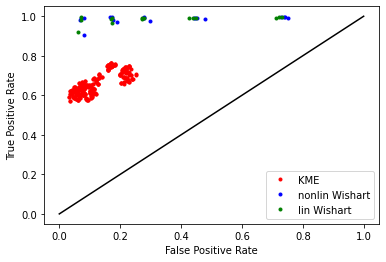

In [53]:
plt.plot(false_pos,true_pos, 'r.',label='KME')    
plt.plot(false_pos_wish_nonlin, true_pos_wish_nonlin, 'b.',label='nonlin Wishart')
plt.plot(false_pos_wish_lin,true_pos_wish_lin,'g.', label='lin Wishart')
plt.plot([0,1],'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()